In [2]:
import pandas as pd
import yfinance as yf
# data = pd.read_excel("data.xlsx",index_col=0,header=(0,1))["Adj Close"]
data = yf.download("WPP.L", period="5y")
print(data.columns)
data = data["Adj Close"]

[*********************100%%**********************]  1 of 1 completed

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


# Cumulative graph

Creates a log cumulative return chart

Input a panda's series

C:\Users\olive\AppData\Local\Temp\ipykernel_9488\2749077613.py:41: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate()


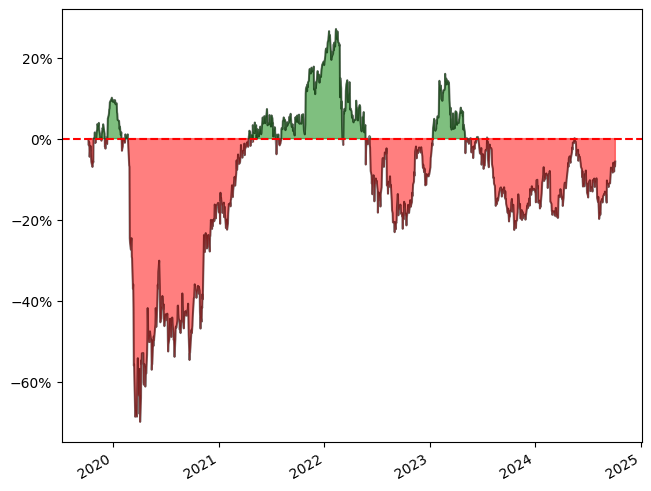

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

# Create series
# data = data["Adj Close"]

if not isinstance(data,pd.Series):
    raise TypeError("input must be pandas series")

log_returns = np.log(data/data.shift(1)).dropna()


fig, ax1 = plt.subplots(1,1, layout='constrained')
ax1.plot(log_returns.cumsum() * 100,color="black",alpha=0.5)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# X axis
ax1.fill_between(log_returns.index,0,log_returns.cumsum()*100,color="red",zorder=1,alpha=0.5, where=log_returns.cumsum()<=0)
ax1.fill_between(log_returns.index,0,log_returns.cumsum()*100,color="green",zorder=1,alpha=0.5, where=log_returns.cumsum()>0)

ax1.axhline(color="red", linestyle="--")

ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))

if len(log_returns) >= 252*4:
    # Long time period
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    # ax1.xaxis.set_minor_locator(mdates.MonthLocator())
elif len(log_returns) >= 252*2:
    # Medium time period
    ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax1.xaxis.set_minor_locator(mdates.MonthLocator())
else:
    # Short time period
    ax1.xaxis.set_major_locator(mdates.MonthLocator())

fig.autofmt_xdate()

# Drawdown

Create a graph of the drawdown. Data must be panda's series

Major and minor ticks adjust based on number of data points.

Data - The panda's series with data, index should be datetime

focus                              WPP.L
max drawdown %                   -80.09%
max drawdown date    2020-04-03 00:00:00
duration start       2022-02-11 00:00:00
duration end         2024-10-04 00:00:00
days drawdown                        666
dtype: object


C:\Users\olive\AppData\Local\Temp\ipykernel_9488\1498689106.py:65: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate()


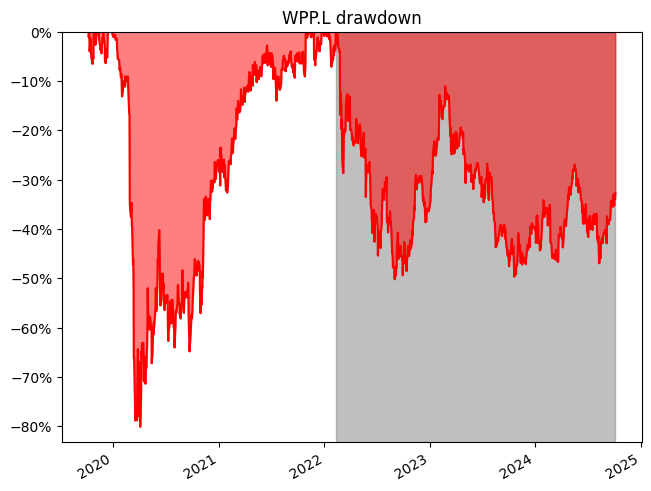

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

focus = "WPP.L"

# Create series
# data = data["Adj Close"]

if not isinstance(data,pd.Series):
    raise TypeError("input must be pandas series")

# Do math
log_returns = np.log(data/data.shift(1)).dropna()
cumulative_returns = log_returns.cumsum()

# Calculating drawdown
drawdown = (cumulative_returns - cumulative_returns.cummax())
deepest  = (cumulative_returns - cumulative_returns.cummax()).cummin()*100
filt = deepest.min() == deepest
deepest_date = deepest.loc[filt].index[0]

uwater   = (cumulative_returns - (cumulative_returns).cummax()) < 0
runs     = (~uwater).cumsum()[uwater]
counts   = runs.value_counts(sort=True).iloc[:1]
max_dur  = counts.iloc[0]

inds     = runs == counts.index[0]
inds     = (inds).where(inds)
start    = inds.first_valid_index()
end      = inds.last_valid_index()

# Create plot
fig, ax1 = plt.subplots(1,1, layout='constrained')
ax1.plot(drawdown * 100,color="red")
plt.title(f"{focus} drawdown")

# Y axis
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax1.fill_between(drawdown.index,drawdown*100,0,alpha=0.5,color="red")

ylim_decision = min(ax1.get_ylim()[0]+1, ax1.get_ylim()[0]*0.98)

ax1.fill_betweenx([0,ax1.get_ylim()[0]],start,end,color="grey",zorder=0,alpha=0.5)
ax1.set_ylim(ylim_decision,0)

# X axis

ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))

if len(log_returns) >= 252*4:
    # Long time period
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    # ax1.xaxis.set_minor_locator(mdates.MonthLocator())
elif len(log_returns) >= 252*2:
    # Medium time period
    ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax1.xaxis.set_minor_locator(mdates.MonthLocator())
else:
    # Short time period
    ax1.xaxis.set_major_locator(mdates.MonthLocator())

fig.autofmt_xdate()

# Info
drawdown_info = {"focus":focus, "max drawdown %":f"{deepest.min():.2f}%", "max drawdown date": deepest_date, "duration start": start, "duration end": end,"days drawdown": f"{max_dur}"}
# max_dur/len(data)*100:.2f
print(pd.Series(drawdown_info))

# Mosiac

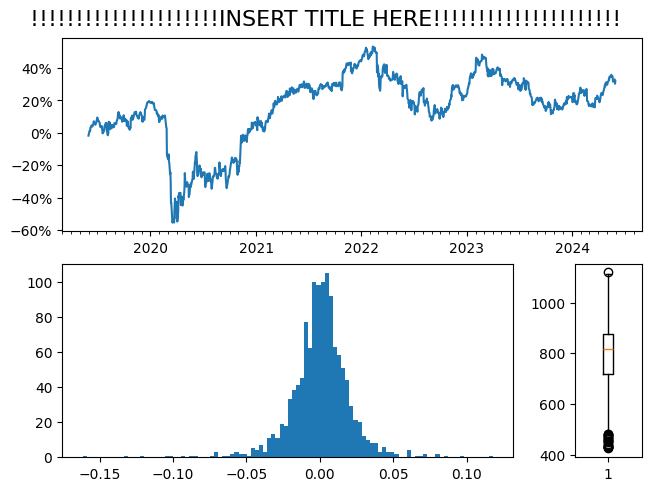

In [68]:
size = 38
fig = plt.figure(layout="constrained")
data0 = data
data1 = data.pct_change()

ax = fig.subplot_mosaic(
    """
    aaaaa
    bbbbc
    """)

ax["a"].plot(data1.cumsum())
ax["b"].hist(data1,bins=100)
ax["c"].boxplot(data0,vert=True)
# ax["c"].axhline(y=0,color="r")

## Formatting
fig.suptitle(f"!!!!!!!!!!!!!!!!!!!!!INSERT TITLE HERE!!!!!!!!!!!!!!!!!!!!!",fontsize=16)
ax["a"].xaxis.set_minor_locator(mdates.MonthLocator())
ax["a"].yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()

# Simple beta

In [1]:
import statsmodels.api as sm

beta_data_frame = pd.DataFrame({"SP500" : market["log_returns"].dropna().values, "CMBS": data["log_returns"].dropna().values})
X = sm.add_constant(beta_data_frame["SP500"])
y = beta_data_frame["CMBS"]

results = sm.OLS(y,X).fit()

print(results.summary())

ModuleNotFoundError: No module named 'statsmodels'